## **Experiment 1**

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


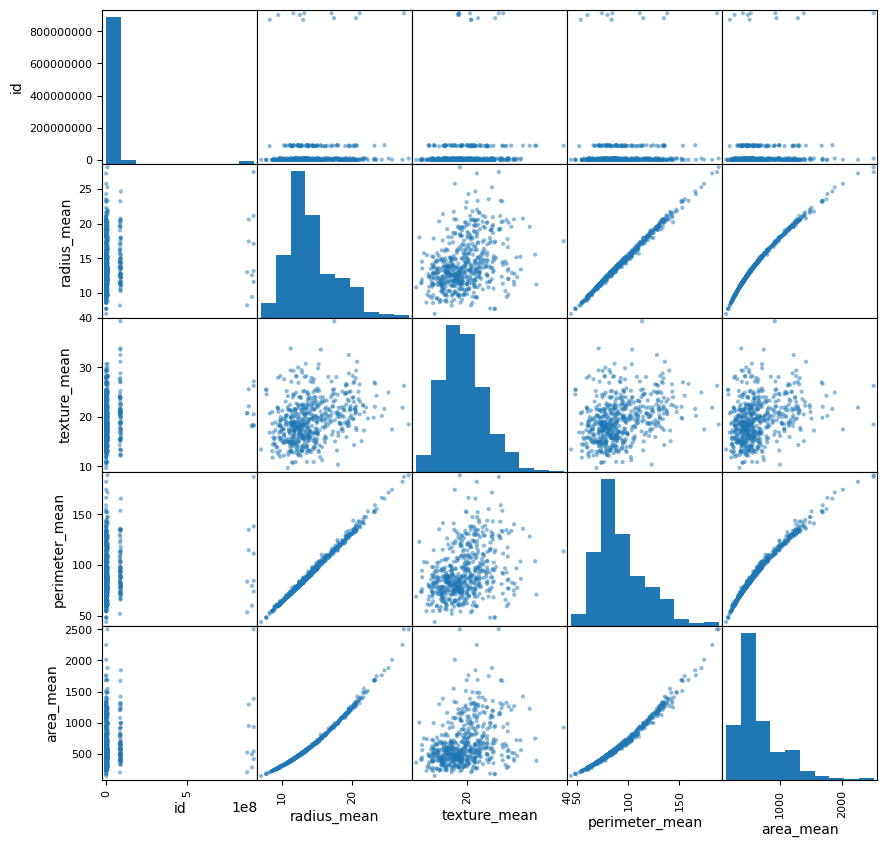

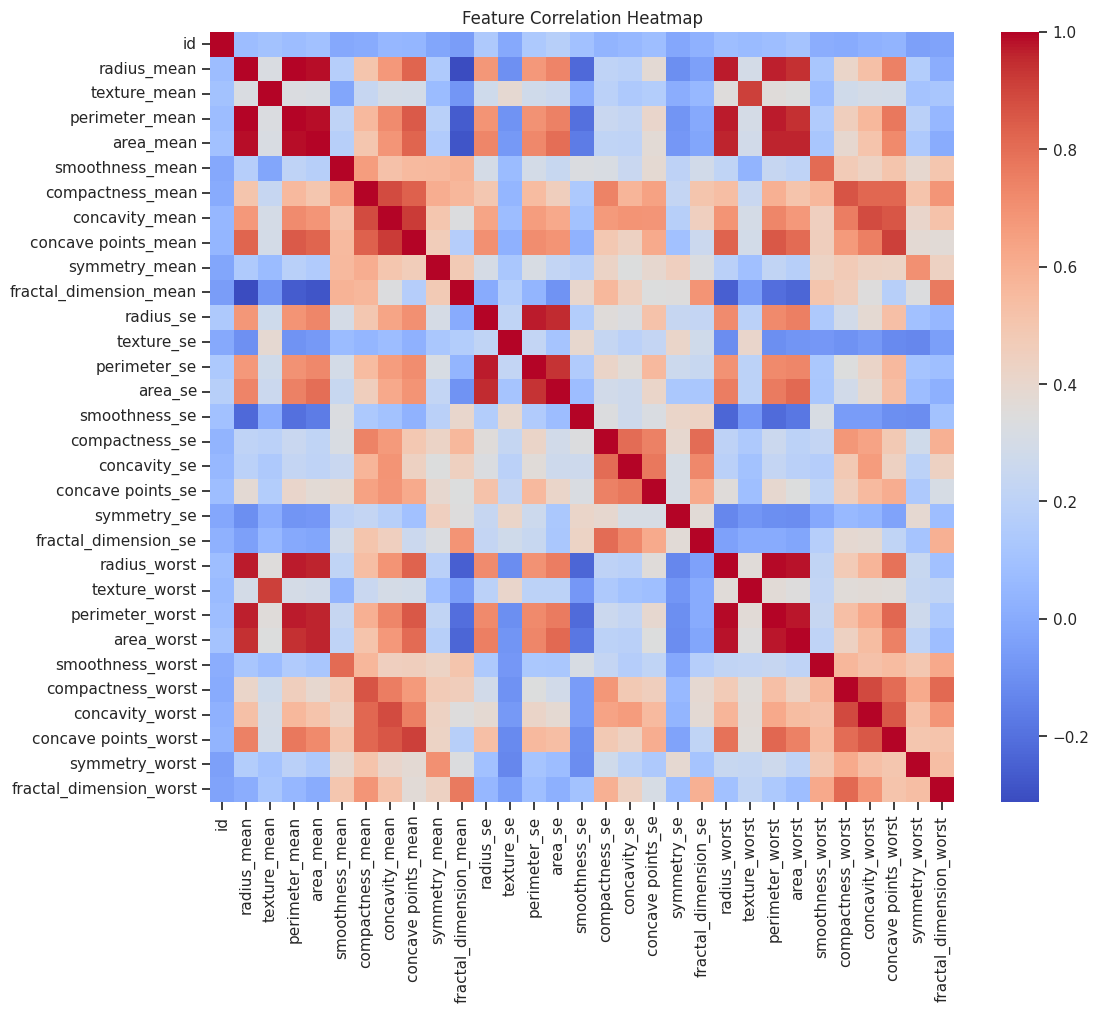

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.svm import SVC
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# ==============================
# Data Analysis and Pre-processing for all three dataset
# ==============================
# #1. Breast Cancer Dataset (default: sklearn)
# breast_cancer = load_breast_cancer()
# df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
# labels = breast_cancer.target

#2. Uncomment to use external Breast Cancer dataset (CSV):
df = pd.read_csv("breast-cancer.csv")
print(df.columns)
labels = df['diagnosis']  # Assuming 'diagnosis' is the correct column name
df = df.drop(['diagnosis'], axis=1)



# 3. Uncomment to use Red Wine Quality dataset (CSV):
# df = pd.read_csv("winequality-red.csv", delimiter=",")
# print(df.columns)
# labels = df['quality']
# df = df.drop(['quality'], axis=1)



# # 4. Uncomment to use Housing Loan Approval dataset (CSV):
# df = pd.read_csv("loan_sanction_train.csv")
# labels = df['Loan_Status']  # Assuming 'Loan_Status' is the target column
# df = df.drop(['Loan_Status'], axis=1)
# df = pd.get_dummies(df, drop_first=True)  # Encode categorical variables

# Exploratory Data Analysis for all 3
scatter_matrix(df.iloc[:, :5], figsize=(10, 10))  # Using first 5 features for visualization
plt.show()

sns.set(style="ticks", color_codes=True)
if 'species' in df.columns:
    sns.pairplot(df, hue='species')

plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
# ==============================
# Preprocessing (Applies to all datasets , Except Bahar wala Breast cancer)
# ==============================

# # Impute missing values and scale features
# imputer = SimpleImputer(strategy='mean')
# scaler = StandardScaler()
# df_imputed = imputer.fit_transform(df)
# df_scaled = scaler.fit_transform(df_imputed)

# # ==============================
# # Preprocessing (Applies  Bahar wala Breast cancer)
# # ==============================

# Encode categorical labels to numeric
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df)

# Scale the imputed dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Train-Test Split
# X_train, X_test, y_train, y_test = train_test_split(df_scaled, labels, test_size=0.2, random_state=42) # rest sabke liya
X_train, X_test, y_train, y_test = train_test_split(df_scaled, labels_encoded, test_size=0.2, random_state=42) # for bahar wala breast cancer


In [ ]:
# # ==============================
# # Model Training and Evaluation for breast cancer and red wine
# # ==============================
# SVM Model
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

# Evaluation
train_accuracy = svm_model.score(X_train, y_train)
test_accuracy = svm_model.score(X_test, y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# # ==============================
# # Model Training and Evaluation for loan
# # ==============================
# Create an imputer to fill missing values
imputer = SimpleImputer(strategy='mean')  # or use 'median' or 'most_frequent'

# Create a pipeline that first imputes missing values and then fits the model
pipeline = make_pipeline(imputer, SVC(kernel='linear', C=1))

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Evaluate the model
train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.989010989010989
Test Accuracy: 0.956140350877193
Train Accuracy: 0.989010989010989
Test Accuracy: 0.956140350877193


In [ ]:
# ==============================
# Predictions for breast cancer
# ==============================

# # Define sample input (user-provided)
sample = np.array([[5, 5, 3, 2], [2, 4, 3, 5]])  # Example input data

# Automatically adjust sample to match the model's feature size
expected_features = df.shape[1]  # Number of features in the dataset

# Handle feature mismatch: Pad or trim to match expected features
if sample.shape[1] < expected_features:
    sample = np.pad(sample, ((0, 0), (0, expected_features - sample.shape[1])), 'constant')
elif sample.shape[1] > expected_features:
    sample = sample[:, :expected_features]

# Convert sample to DataFrame with feature names (fixes warning)
# sample_df = pd.DataFrame(sample, columns=breast_cancer.feature_names) # If sk learn se load kiya toh breast cancer
sample_df = pd.DataFrame(sample, columns=df.columns) # if bahar se load kiya toh breast cancer

# Scale the sample
sample_scaled = scaler.transform(sample_df)

# # Make predictions
predictions = svm_model.predict(sample_scaled)

#if bahar se breast cancer kiya toh
if 'diagnosis' in labels.unique():
    pred_labels = ['malignant' if p == 1 else 'benign' for p in predictions]
else:
    pred_labels = predictions  # If labels aren't binary, keep raw predictions

print("Predictions:", pred_labels)


# # Map predictions to human-readable labels
# #If sk learn se kiya toh breast cancer
# pred_labels = [breast_cancer.target_names[p] for p in predictions]
# print("Predictions:", pred_labels)



# # ==============================
# # Predictions for Red Wine Quality
# # ==============================
# # Define sample input with correct dimensions (11 features)
# sample = np.array([[5, 5, 3, 2, 1, 0.5, 120, 1.01, 3.3, 0.7, 10.0],
#                    [2, 4, 3, 5, 0.9, 0.4, 110, 1.00, 3.0, 0.8, 9.5]])

# # Convert sample to DataFrame with correct column names
# sample_df = pd.DataFrame(sample, columns=df.columns)

# # Scale the sample
# sample_scaled = scaler.transform(sample_df)

# # Make predictions
# predictions = svm_model.predict(sample_scaled)
# print("Predictions:", predictions)


Predictions: [0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
